In [1]:
import numpy as np
import merg_rates3 as merg_rates
from progressbar import ProgressBar

In [2]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
htpm=merg_rates.HalTreepmClass()

# in merg_rates3.HalTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_18

In [4]:
scat=0.
mmin=3.

mar_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('marchesini'),
                                  scat=scat,
                                  mmin=mmin)
per_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('perez'),
                                  scat=scat,
                                  mmin=mmin)
san_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('santini'),
                                  scat=scat,
                                  mmin=mmin)
fon_tpm=merg_rates.GalTreepmClass(htpm, 
                                  source=merg_rates.bld_smf_compo('fontana'),
                                  scat=scat, mmin=mmin)

tpms=[mar_tpm, per_tpm, san_tpm, fon_tpm]
for tpm in tpms:
    htpm.mp_tree(gal_tpm=tpm)
    htpm.merg_tree(gal_tpm=tpm)

running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


# $\frac{dN}{dz}(z)$

In [5]:
def plt_dNdx_ofz(tpm, typ, dx, Mcond, smf_lbl, ziend=34):     
    dNdxs_gal_3=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                              mu_cond=np.log10(1./3.),
                              typ=typ, dx=dx,
                              ziend=ziend)
    dNdxs_gal_10=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                               mu_cond=np.log10(1./10.),
                               typ=typ, dx=dx,
                               ziend=ziend)

    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    ax.plot(dNdxs_gal_3[0],dNdxs_gal_3[1],
            label='$\mu=\\frac{1}{3}$')
    ax.plot(dNdxs_gal_10[0],dNdxs_gal_10[1],
            label='$\mu=\\frac{1}{10}$')
    ax.set_xlabel('$z$')
    if dx=='dz':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / z]'.format(dx))
    elif dx=='dt':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / Gyr]'.format(dx))
    else:
        raise ValueError('unexpected dx')
    ax.set_yscale('log')
    #ax.set_ylim(1e-4,5e-1)
    if tpm is None:
        ax.set_title('{0}'
                     '\n$M_0=10^{{{1:0.1f}}}$ M$_\odot$'
                     .format(smf_lbl,Mcond))
    else:
        ax.set_title('{0}'
                     '\n$M_0=10^{{{1:0.1f}}}$ M$_\odot$'
                     ', $\sigma={2:0.1f}$'.format(smf_lbl,Mcond,tpm.scat))
    ax.legend()
    plt.show()

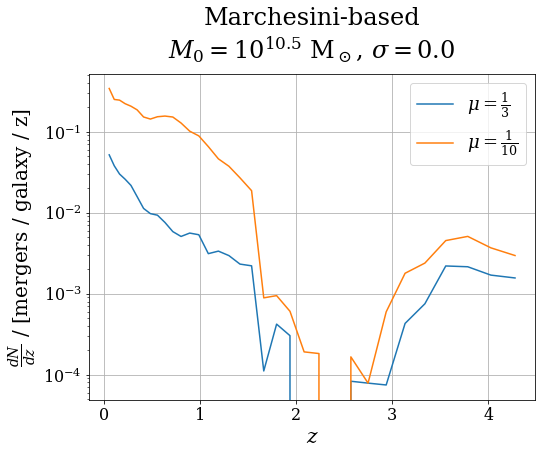

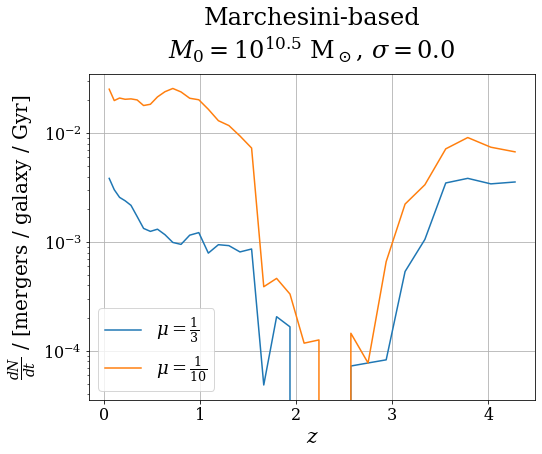

In [6]:
plt_dNdx_ofz(tpm=mar_tpm, typ='cengal', dx='dz', Mcond=10.5, 
             smf_lbl='Marchesini-based')
plt_dNdx_ofz(tpm=mar_tpm, typ='cengal', dx='dt', Mcond=10.5, 
             smf_lbl='Marchesini-based')

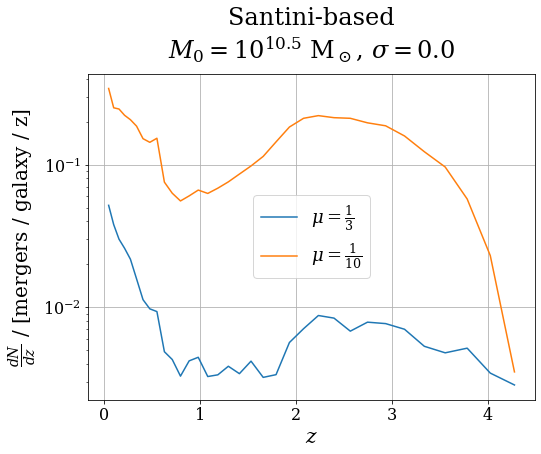

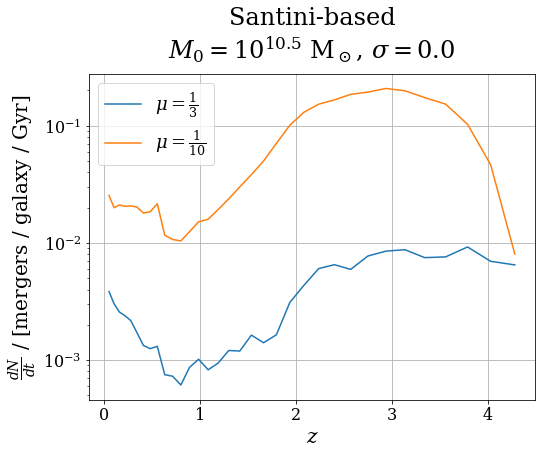

In [7]:
plt_dNdx_ofz(tpm=san_tpm, typ='cengal', dx='dz', Mcond=10.5, 
             smf_lbl='Santini-based')
plt_dNdx_ofz(tpm=san_tpm, typ='cengal', dx='dt', Mcond=10.5, 
             smf_lbl='Santini-based')

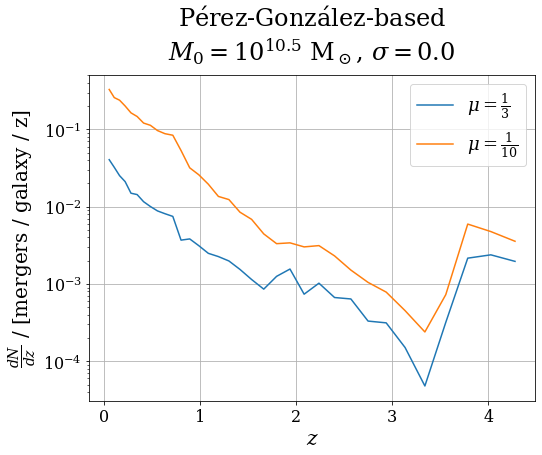

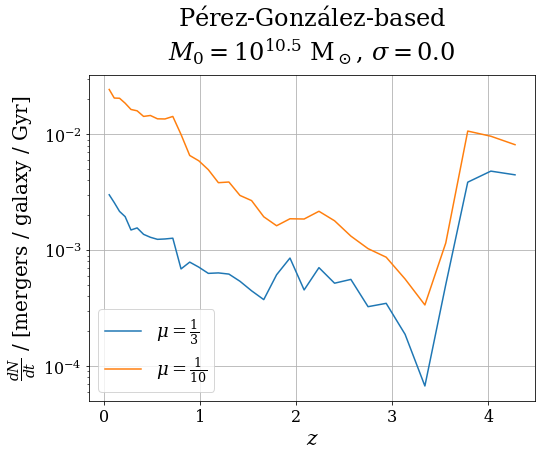

In [8]:
pertxt='P$\mathrm{\\acute{e}}$rez-Gonz$\mathrm{\\acute{a}}$lez'
plt_dNdx_ofz(tpm=per_tpm, typ='cengal', dx='dz', Mcond=10.5, 
             smf_lbl=pertxt+'-based')
plt_dNdx_ofz(tpm=per_tpm, typ='cengal', dx='dt', Mcond=10.5, 
             smf_lbl=pertxt+'-based')

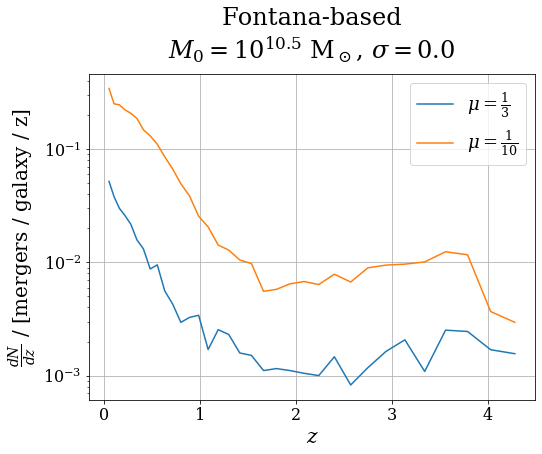

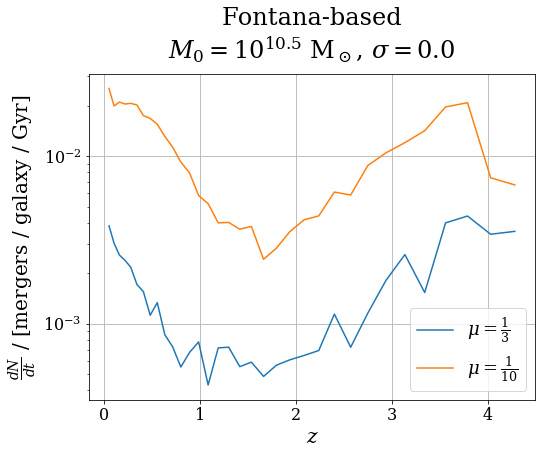

In [9]:
plt_dNdx_ofz(tpm=fon_tpm, typ='cengal', dx='dz', Mcond=10.5, 
             smf_lbl='Fontana-based')
plt_dNdx_ofz(tpm=fon_tpm, typ='cengal', dx='dt', Mcond=10.5, 
             smf_lbl='Fontana-based')

building main progenitor tree:


100% |########################################################################|


building merger tree


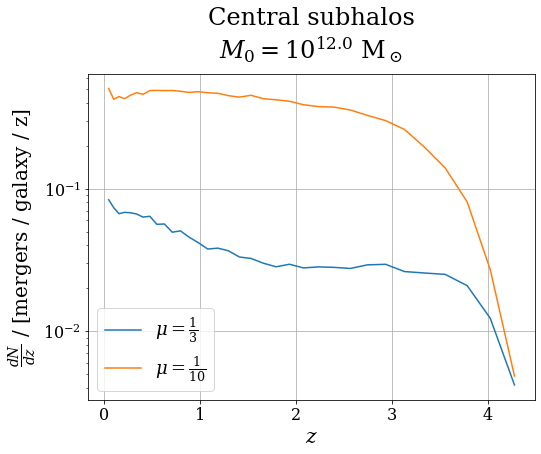

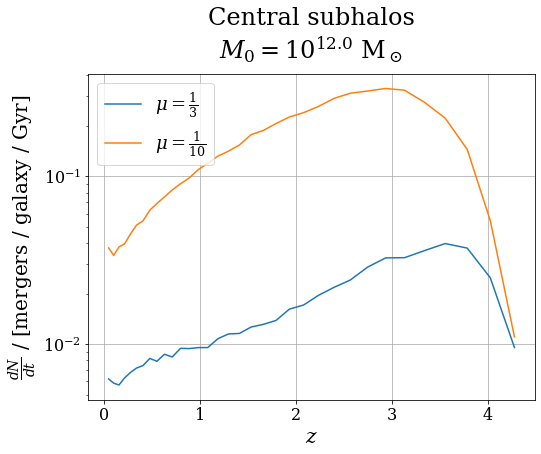

In [10]:
plt_dNdx_ofz(tpm=None, typ='censubhal', dx='dz', Mcond=12., 
             smf_lbl='Central subhalos')
plt_dNdx_ofz(tpm=None, typ='censubhal', dx='dt', Mcond=12., 
             smf_lbl='Central subhalos')

  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo from halo_tree_21.dat
  read  39

building main progenitor tree:


100% |########################################################################|


building merger tree


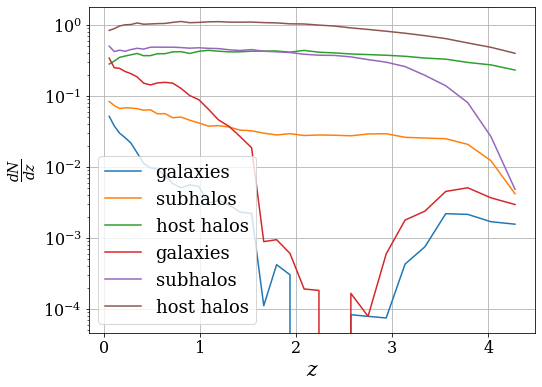

In [11]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

mu=np.log10(1./3.)
zs_gal,dNdzs_gal=htpm.dNdx_ofz(10.5,mu,
                               'cengal',dx='dz',
                               galtpm=mar_tpm, ziend=34)
zs_sub,dNdzs_sub=htpm.dNdx_ofz(12.,mu,
                               'censubhal',dx='dz',ziend=34)
zs_host,dNdzs_host=htpm.dNdx_ofz(12.,mu,'host',
                                 dx='dz',ziend=34)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

mu=np.log10(1./10.)
zs_gal,dNdzs_gal=htpm.dNdx_ofz(10.5,mu,
                               'cengal',dx='dz',
                               galtpm=mar_tpm, ziend=34)
zs_sub,dNdzs_sub=htpm.dNdx_ofz(12.,mu,
                               'censubhal',dx='dz',ziend=34)
zs_host,dNdzs_host=htpm.dNdx_ofz(12.,mu,'host',
                                 dx='dz',ziend=34)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$')
ax.set_yscale('log')
#ax.set_ylim(0,4)
ax.legend()
plt.show()